In [36]:
import pandas as pd
import numpy as np
import urllib.request
import matplotlib as mpl
# import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc # 한글넣기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력하게 해주는것
font_path = '../visualization/dataset/malgun.ttf' # 해당파일 visualization > dataset에 있음
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

# 1.시장규모 데이터 전처리

In [73]:
size_df=pd.read_csv('5조 데이터/data1.csv',encoding='cp949')
size_df

,데이터산업별(1),2015,2016,2017,2018,2019,2020,2021 e)
0,전체,133555,137547,143530,155684,168582,200024,230972
1,데이터 처리 및 관리 솔루션 개발·공급업,14124,15720,16457,18617,20805,25133,30566
2,데이터 구축 및 컨설팅 서비스업,55280,55850,58894,61290,65412,76999,86335
3,데이터 판매 및 제공 서비스업,64151,65977,68179,75778,82364,97891,114071


In [74]:
size_df=size_df.rename(columns={'데이터산업별(1)':'산업구분','2021 e)':'2021'})
# df1.columns = ['산업구분','2015년','2016년','2017년','2018년','2019년','2020년','2021년']

size_df=size_df.T
size_df=size_df.rename(columns=size_df.iloc[0])
size_df.drop([size_df.index[0]],inplace=True)
size_df=size_df.astype('int')
size_df=size_df[['데이터 처리 및 관리 솔루션 개발·공급업','데이터 구축 및 컨설팅 서비스업','데이터 판매 및 제공 서비스업','전체']]


In [75]:
size_df

,데이터 처리 및 관리 솔루션 개발·공급업,데이터 구축 및 컨설팅 서비스업,데이터 판매 및 제공 서비스업,전체
2015,14124,55280,64151,133555
2016,15720,55850,65977,137547
2017,16457,58894,68179,143530
2018,18617,61290,75778,155684
2019,20805,65412,82364,168582
2020,25133,76999,97891,200024
2021,30566,86335,114071,230972


## 막대형 시각화

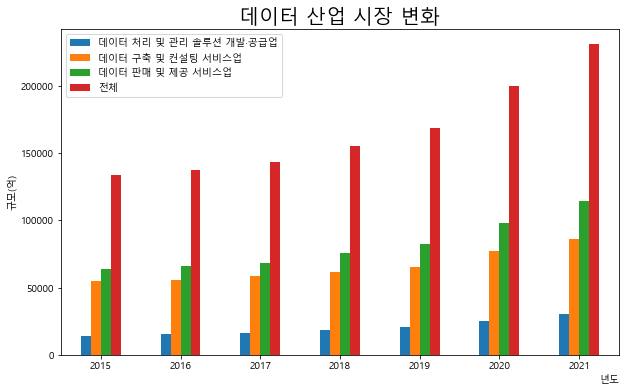

In [77]:
size_df.plot(kind='bar',figsize=(10,6), width=0.5)
plt.width=4
plt.title ('데이터 산업 시장 변화',fontsize=20)
plt.xlabel('년도', loc='right', size=10)
plt.ylabel('규모(억)')
plt.xticks(rotation =0)
plt.show()
# plt.savefig('1_1.png', dpi=200)

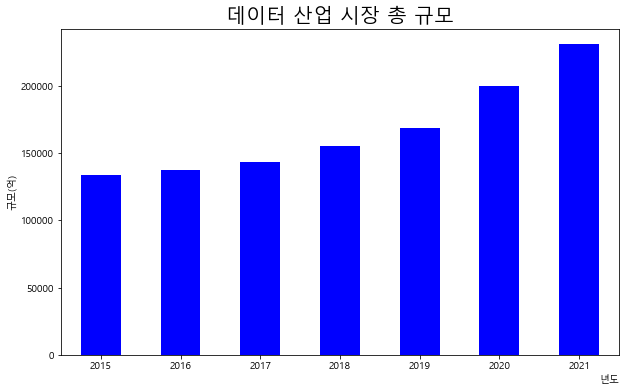

In [79]:
size_df['전체'].plot(kind='bar',figsize=(10,6), width=0.5, color='blue')
plt.title ('데이터 산업 시장 총 규모',fontsize=20)
plt.xlabel('년도', loc='right', size=10)
plt.ylabel('규모(억)')
plt.xticks(rotation =0)
plt.show()
# plt.savefig('1_4.png', dpi=200)

## 스택바 시각화

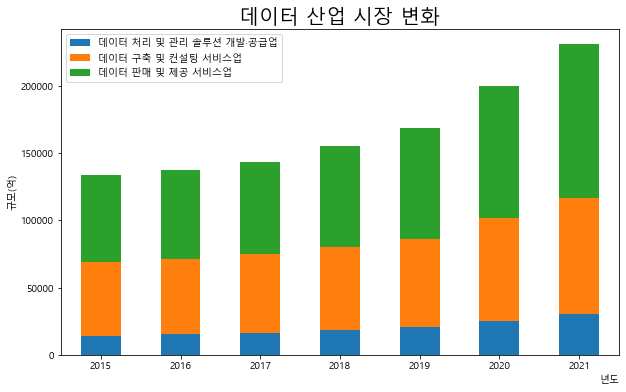

In [42]:
size_df=size_df.drop('전체',axis=1)
size_df.plot.bar(stacked=True,figsize=(10,6), width=0.5)
plt.title ('데이터 산업 시장 변화',fontsize=20)
plt.xlabel('년도', loc='right', size=10)
plt.ylabel('규모(억)')

plt.xticks(rotation =0)
plt.show()
# plt.savefig('1_2.png', dpi=200)

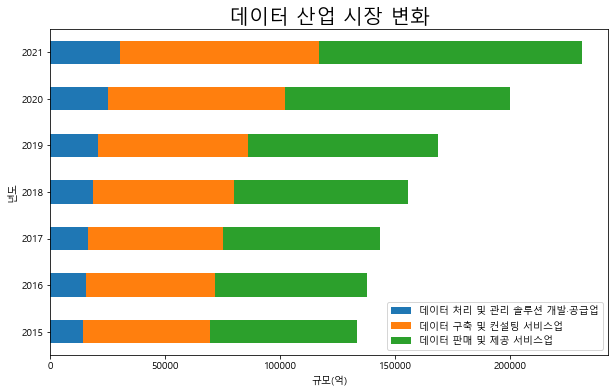

In [43]:
size_df.plot.barh(stacked=True,figsize=(10,6), width=0.5)
plt.title ('데이터 산업 시장 변화',fontsize=20)
plt.xlabel('규모(억)')
plt.ylabel('년도')
plt.show()
# plt.savefig('1_3.png', dpi=200)

In [44]:
'2015년 대비 2021년도의 시장 규모'
230972/133555*100

172.94148478155066

꾸준히 성장하고 있고 갈수록 성장세가 뚜렷해지고 있다.

# 2. 산업별 인력현황 전처리

In [46]:
current_df=pd.read_csv('5조 데이터/data2.csv',encoding='cp949')
current_df=current_df.drop('데이터직무별(1)',axis=1)
current_df=current_df.drop(0)
current_df.columns = ['산업구분','2015','2016','2017','2018','2019','2020','2021']
current_df.set_index('산업구분', inplace=True)
current_df=current_df.T
current_df=current_df[['데이터 처리 및 관리 솔루션 개발·공급업','데이터 구축 및 컨설팅 서비스업','데이터 판매 및 제공 서비스업','전체']]
current_df=current_df.astype('int')
current_df.dtypes

산업구분
데이터 처리 및 관리 솔루션 개발·공급업    int32
데이터 구축 및 컨설팅 서비스업         int32
데이터 판매 및 제공 서비스업          int32
전체                        int32
dtype: object

In [47]:
current_df

산업구분,데이터 처리 및 관리 솔루션 개발·공급업,데이터 구축 및 컨설팅 서비스업,데이터 판매 및 제공 서비스업,전체
2015,8886,34323,27129,70338
2016,9272,35404,28580,73256
2017,10291,37516,29298,77105
2018,11541,40197,30885,82623
2019,13467,42979,32611,89058
2020,17273,48644,36050,101967
2021,22124,58733,41574,122431


## 막대그래프 시각화

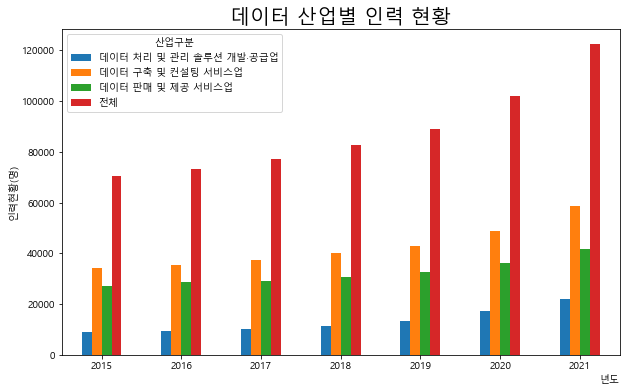

In [48]:
current_df.plot(kind='bar',figsize=(10,6), width=0.5)
plt.width=4
plt.title ('데이터 산업별 인력 현황',fontsize=20)
plt.xlabel('년도', loc='right', size=10)
plt.ylabel('인력현황(명)')
plt.xticks(rotation =0)
plt.show()
# plt.savefig('2_1.png', dpi=200)

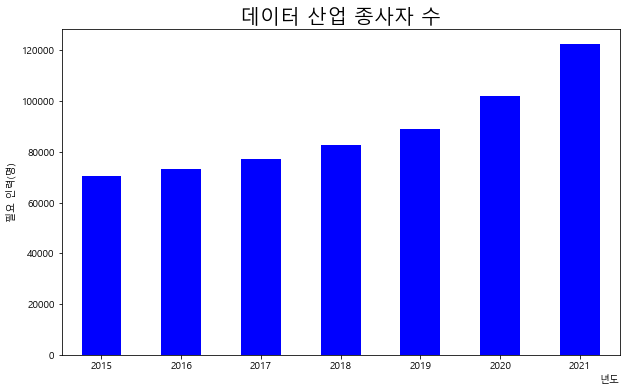

In [49]:
current_df['전체'].plot(kind='bar',figsize=(10,6), width=0.5, color='blue')
plt.title ('데이터 산업 종사자 수',fontsize=20)
plt.xlabel('년도', loc='right', size=10)
plt.ylabel('필요 인력(명)')
plt.xticks(rotation =0)
plt.show()
# plt.savefig('2_2.png', dpi=200)

## 스택바 시각화

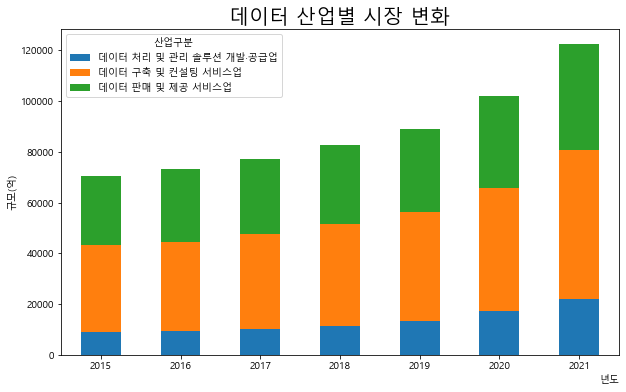

In [50]:
current_df=current_df.drop('전체',axis=1)
current_df.plot.bar(stacked=True,figsize=(10,6), width=0.5)
plt.title ('데이터 산업별 시장 변화',fontsize=20)
plt.xlabel('년도', loc='right', size=10)
plt.ylabel('규모(억)')

plt.xticks(rotation =0)
plt.show()
# plt.savefig('2_3.png', dpi=200)

In [52]:
current_df

산업구분,데이터 처리 및 관리 솔루션 개발·공급업,데이터 구축 및 컨설팅 서비스업,데이터 판매 및 제공 서비스업
2015,8886,34323,27129
2016,9272,35404,28580
2017,10291,37516,29298
2018,11541,40197,30885
2019,13467,42979,32611
2020,17273,48644,36050
2021,22124,58733,41574


```
데이터 산업별 현재 5년간의 산업별 비중을 확인할수 있다.
현 5년간은 데이터 판매와 구축 분야의 비율이 높은걸 확인할수 있다.
```

# 3.데이터 산업별 인력 부족률 전처리

In [63]:
a=pd.read_csv('5조 데이터/data4.csv',encoding='cp949')
a

,데이터직무별(1),2016,2017,2018,2019,2020
0,데이터직무별(1),전체,전체,전체,전체,전체
1,평균,17.8,17.9,32.7,25.4,26.6
2,데이터 아키텍트,-,-,40.1,4.4,9.4
3,데이터 개발자,27.0,26.1,35.1,26.7,24.5
4,데이터 엔지니어,9.3,10.2,28.4,6.4,15.1
5,데이터 분석가,33.7,37.3,53.4,57.8,57.6
6,데이터베이스 관리자,-,-,19.9,3.1,7.0
7,데이터 과학자,13.2,11.0,15.8,53.7,57.5
8,데이터 컨설턴트,6.1,7.1,28.2,7.3,3.4
9,데이터 기획자,22.6,23.9,30.5,10.6,10.5


인력 부족률 : 필요(부족) 인력/(현재 인력+필요(부족) 인력)x100

필요인력 : 기업에서 현재 인력보다 추가로 더 필요로 하는 인력수를 의미함. 즉, 현재 부족한 인력수를 의미하며, 채용 계획 인력수는 아님.

2016년~2017년 자료는 향후 3년 내 데이터산업 내 데이터직무 인력 부족률

In [53]:
shortage_df=pd.read_csv('5조 데이터/data4.csv',encoding='cp949')
# shortage_df.drop(['데이터직무별(1)'],axis=1, inplace=True)
shortage_df.drop([shortage_df.index[0]] ,inplace=True)
shortage_df.drop([shortage_df.index[1]] ,inplace=True)
shortage_df.drop([shortage_df.index[4]] ,inplace=True)
shortage_df.columns = ['산업구분','2016','2017','2018','2019','2020']
shortage_df=shortage_df.T
shortage_df=shortage_df.rename(columns=shortage_df.iloc[0])
shortage_df.drop([shortage_df.index[0]],inplace=True)
shortage_df=shortage_df.astype('float')
shortage_df

,평균,데이터 개발자,데이터 엔지니어,데이터 분석가,데이터 과학자,데이터 컨설턴트,데이터 기획자
2016,17.8,27.0,9.3,33.7,13.2,6.1,22.6
2017,17.9,26.1,10.2,37.3,11.0,7.1,23.9
2018,32.7,35.1,28.4,53.4,15.8,28.2,30.5
2019,25.4,26.7,6.4,57.8,53.7,7.3,10.6
2020,26.6,24.5,15.1,57.6,57.5,3.4,10.5


## 막대 그래프 시각화

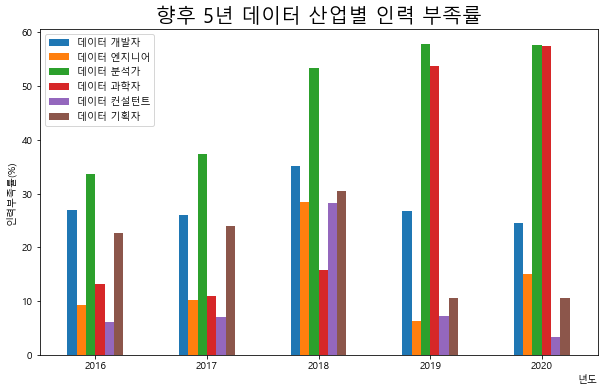

In [54]:
shortage_df.drop(['평균'],axis=1,inplace=True)
shortage_df.plot(kind='bar',figsize=(10,6), width=0.5)
plt.width=4
plt.title ('향후 5년 데이터 산업별 인력 부족률',fontsize=20)
plt.xlabel('년도', loc='right', size=10)
plt.ylabel('인력부족률(%)')
plt.xticks(rotation =0)
plt.show()
# plt.savefig('3_1.png', dpi=200)

## 파이 시각화

In [55]:
shortage_df2=shortage_df.T
shortage_df2.drop([shortage_df2.index[0]] ,inplace=True)
shortage_df2 = shortage_df2.reset_index(drop = False)
shortage_df2

,index,2016,2017,2018,2019,2020
0,데이터 엔지니어,9.3,10.2,28.4,6.4,15.1
1,데이터 분석가,33.7,37.3,53.4,57.8,57.6
2,데이터 과학자,13.2,11.0,15.8,53.7,57.5
3,데이터 컨설턴트,6.1,7.1,28.2,7.3,3.4
4,데이터 기획자,22.6,23.9,30.5,10.6,10.5


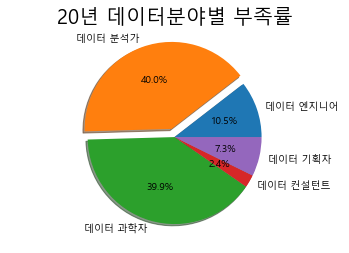

In [65]:
shortage_df2
plt.title('20년 데이터분야별 부족률',fontsize=20)
explode = (0,0.1,0,0,0)
plt.axis('equal')
plt.pie(shortage_df2['2020'], autopct = '%1.1f%%' ,labels = shortage_df2['index'], shadow=True ,explode=explode) 
plt.show()
# plt.savefig('3_2.png', dpi=200)

```
인력 부족률 : 필요(부족) 인력/(현재 인력+필요(부족) 인력)x100
필요인력 : 기업에서 현재 인력보다 추가로 더 필요로 하는 인력수를 의미함. 
막대 그래프 : 분석가와 과학자 분야의 부족률이 현저희 높아지고 있
```

# 4.향후 5년 필요 인력 전처리

In [57]:
future_df=pd.read_csv('5조 데이터/data5.csv',encoding='cp949')
future_df.drop(['2018','2019','2020','2021'],axis=1, inplace=True)
future_df.drop([future_df.index[0]] ,inplace=True)
future_df.drop([future_df.index[0]] ,inplace=True)
future_df.columns = ['산업구분','2018','2019','2020','2021']
future_df=future_df.T
future_df=future_df.rename(columns=future_df.iloc[0])
future_df.drop([future_df.index[0]],inplace=True)
future_df=future_df.astype('int')
future_df.dtypes

전체            int32
데이터 아키텍트      int32
데이터 개발자       int32
데이터 엔지니어      int32
데이터 분석가       int32
데이터베이스 관리자    int32
데이터 과학자       int32
데이터 컨설턴트      int32
데이터 기획자       int32
dtype: object

In [58]:
future_df

,전체,데이터 아키텍트,데이터 개발자,데이터 엔지니어,데이터 분석가,데이터베이스 관리자,데이터 과학자,데이터 컨설턴트,데이터 기획자
2018,9472,715,2968,969,1559,1003,318,956,984
2019,8484,86,4870,785,1145,184,836,165,413
2020,12114,327,5775,1624,1281,470,1106,844,687
2021,16984,446,8035,2131,1744,825,1738,1062,1004


## 막대그래프 시각화

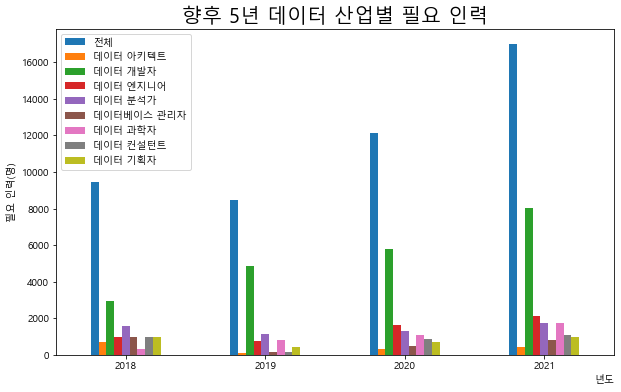

In [59]:
future_df.plot(kind='bar',figsize=(10,6), width=0.5)
plt.width=4
plt.title ('향후 5년 데이터 산업별 필요 인력',fontsize=20)
plt.xlabel('년도', loc='right', size=10)
plt.ylabel('필요 인력(명)')
plt.xticks(rotation =0)
plt.show()
# plt.savefig('4_1.png', dpi=200)

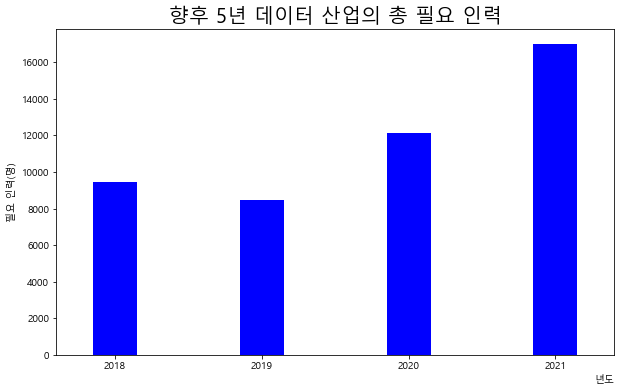

In [60]:
future_df['전체'].plot(kind='bar',figsize=(10,6), width=0.3, color='blue')
plt.title ('향후 5년 데이터 산업의 총 필요 인력',fontsize=20)
plt.xlabel('년도', loc='right', size=10)
plt.ylabel('필요 인력(명)')
plt.xticks(rotation =0)
plt.show()
# plt.savefig('4_2.png', dpi=200)

19년도는 코로나때문에 감소한듯

## Stacked Bar 시각화

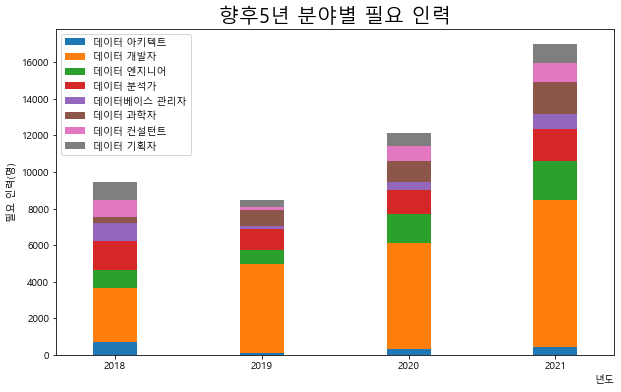

In [61]:
future_df2=future_df.drop(['전체'],axis=1)
future_df2.plot.bar(stacked=True,figsize=(10,6), width=0.3)
plt.title('향후5년 분야별 필요 인력', fontsize=20)
plt.xlabel('년도', loc='right')
plt.ylabel('필요 인력(명)')
plt.xticks(rotation =0)
plt.show()
# plt.savefig('4_3.png', dpi=200)